<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/NM/%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D0%B8_%D0%BD%D0%B5%D1%87%D0%B5%D1%82%D0%BA%D0%BE%D0%B9_%D0%BB%D0%BE%D0%B3%D0%B8%D0%BA%D0%B8_%D0%B4%D0%BB%D1%8F_%D0%BF%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%B4%D0%B8%D0%BD%D0%B0%D0%BC%D0%B8%D0%BA%D0%B8_%D0%BA%D1%83%D1%80%D1%81%D0%B0_%D1%80%D1%83%D0%B1%D0%BB%D1%8F_%D0%BD%D0%B0_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B5_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE_%D1%86%D0%B5%D0%BD%D0%B0%D1%85_%D0%BD%D0%B0_%D0%BD%D0%B5%D1%84%D1%82%D1%8C%2C_%D0%B8%D0%BD%D1%84%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%B8_%D0%B3%D0%B5%D0%BE%D0%BF%D0%BE%D0%BB%D0%B8%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D1%80%D0%B8%D1%81%D0%BA%D0%B0%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Применение теории нечеткой логики для прогнозирования динамики курса рубля на основе данных о ценах на нефть, инфляции и геополитических рисках

## Введение
Моделирование временных рядов — это процесс построения математических моделей, которые позволяют анализировать и прогнозировать поведение динамических систем. Традиционные методы моделирования временных рядов (например, ARIMA, SARIMA, LSTM) основываются на статистических или нейросетевых подходах. Однако эти методы могут сталкиваться с ограничениями при работе с данными, имеющими неопределенность, шум или сложные зависимости.

Нечеткая логика предлагает альтернативный подход к моделированию временных рядов, который особенно эффективен для систем с неопределенностью, нелинейностями и сложными взаимосвязями. В этой лекции мы рассмотрим основы нечеткой логики, её применение для моделирования временных рядов и конкретные примеры реализации.




## 1. Что такое нечеткая логика?

Нечеткая логика — это математическая парадигма, которая была впервые предложена Лотфи Заде (Lotfi A. Zadeh) в 1965 году. Она представляет собой обобщение классической булевой логики и теории множеств, позволяющее работать с неопределенными, нечёткими или приблизительными понятиями. В отличие от традиционных подходов, где объект либо принадлежит множеству (логическое значение 1), либо не принадлежит ему (логическое значение 0), нечеткая логика позволяет описывать степень принадлежности объекта к множеству числом из интервала [0, 1]. Это делает её особенно полезной для моделирования реальных-world систем, которые часто характеризуются неопределенностью, нечёткостью или сложностью.

### 1.1. Определение

Основная идея нечеткой логики заключается в том, что границы между категориями могут быть размытыми, а не жёстко определёнными. Например:
- В булевой логике температура может быть просто "холодной" (если она ниже 10°C) или "теплой" (если выше 10°C).
- В нечеткой логике температура может быть как "холодной", так и "теплой" одновременно, но с разной степенью принадлежности. Например, температура 8°C может иметь степень принадлежности 0.7 к категории "холодно" и 0.3 к категории "тепло".

Таким образом, нечеткая логика позволяет более точно описывать реальные ситуации, где границы между категориями часто не являются чёткими.



### 1.2. Основные компоненты нечеткой логики

#### 1.2.1. Нечеткие множества
Нечеткое множество — это обобщение классического множества, где каждый элемент имеет некоторую степень принадлежности этому множеству. Формально, нечеткое множество $ A $ в универсуме $ X $ определяется функцией принадлежности $ \mu_A(x) $, которая ставит каждому элементу $ x \in X $ число из интервала [0, 1], показывающее степень его принадлежности множеству $ A $.

Пример:
Пусть $ X = \{1, 2, 3, 4, 5\} $ — множество температур (в градусах). Мы можем определить нечеткое множество "Холодные температуры" следующим образом:
$$
\mu_{\text{Холодно}}(x) =
\begin{cases}
1, & \text{если } x \leq 5, \\
0.5, & \text{если } 5 < x \leq 10, \\
0, & \text{если } x > 10.
\end{cases}
$$

Здесь температура 3°C полностью принадлежит множеству "Холодно" ($ \mu_{\text{Холодно}}(3) = 1 $), а температура 7°C частично принадлежит ($ \mu_{\text{Холодно}}(7) = 0.5 $).



#### 1.2.2. Членство функции (Функция принадлежности)
Членство функция (функция принадлежности) — это основной инструмент нечеткой логики, который формализует концепцию "степени принадлежности". Она задаёт, насколько конкретный элемент принадлежит нечеткому множеству. Функция принадлежности может принимать различные формы, такие как:
- **Треугольная форма**: Используется для простых моделей, где границы категорий имеют ясную форму треугольника.
- **Трапециевидная форма**: Позволяет учитывать более широкие переходные зоны между категориями.
- **Гауссовская форма**: Описывает нормальное распределение принадлежности.
- **С-образная и S-образная формы**: Используются для описания монотонных переходов.

Пример треугольной функции принадлежности:
$$
\mu_{\text{Умеренно}}(x) =
\begin{cases}
0, & \text{если } x \leq 10 \text{ или } x \geq 30, \\
\frac{x - 10}{20}, & \text{если } 10 < x \leq 20, \\
\frac{30 - x}{10}, & \text{если } 20 < x < 30.
\end{cases}
$$



#### 1.2.3. Правила вывода
Правила вывода в нечеткой логике представляют собой условные операторы типа "ЕСЛИ ... ТО ...", которые связывают входные переменные с выходными. Они используются для построения системы правил, которые описывают поведение системы.

Общий вид правила:
$$
\text{ЕСЛИ } x_1 \text{ является } A_1 \text{ И } x_2 \text{ является } A_2, \text{ ТО } y \text{ является } B,
$$
где:
- $ x_1, x_2 $ — входные переменные.
- $ A_1, A_2 $ — нечеткие множества для входных переменных.
- $ y $ — выходная переменная.
- $ B $ — нечеткое множество для выходной переменной.

Пример:
$$
\text{ЕСЛИ Температура является Холодной И Скорость ветра является Высокой, ТО Уровень комфорта является Низким.}
$$

Правила могут быть созданы экспертами на основе их знаний или автоматически выведены из данных.



#### 1.2.4. Агрегация
Агрегация — это процесс объединения результатов нескольких нечетких правил. Поскольку в типичной нечеткой системе может активироваться несколько правил одновременно, необходимо объединить их выводы в один нечеткий набор. Для этого используются различные методы агрегации:
- **Максимизация**: Берётся максимальное значение степени принадлежности среди всех правил.
- **Суммирование**: Все значения суммируются.
- **Произведение**: Произведение степеней принадлежности.

Пример:
Если два правила дают следующие результаты:
- Первое правило: "Уровень комфорта является Средним" со степенью 0.7.
- Второе правило: "Уровень комфорта является Высоким" со степенью 0.5.

То после агрегации мы получаем нечеткое множество, которое объединяет оба результата.



#### 1.2.5. Дефаззификация
Дефаззификация — это последний этап в нечеткой логике, где нечеткий результат преобразуется в четкое числовое значение. Это необходимо для того, чтобы получить конкретный вывод, который можно использовать в реальной системе.

Наиболее распространённые методы дефаззификации:
1. **Центр тяжести (Center of Gravity)**: Находит точку равновесия нечеткого множества.
   $$
   y_{\text{defuzz}} = \frac{\int y \cdot \mu_B(y) \, dy}{\int \mu_B(y) \, dy},
   $$
   где $ \mu_B(y) $ — функция принадлежности выходного множества.

2. **Максимальное значение (Max Membership)**: Выбирает значение, соответствующее максимальной степени принадлежности.

3. **Среднее взвешенное**: Вычисляет среднее значение, взвешенное степенями принадлежности.

Пример:
Если после агрегации получено нечеткое множество с функцией принадлежности, то метод центра тяжести даст конкретное числовое значение уровня комфорта.



### 1.3. Пример использования компонентов нечеткой логики

Рассмотрим пример прогнозирования погоды:
1. **Входные переменные**:
   - Температура воздуха.
   - Скорость ветра.
2. **Нечеткие множества**:
   - Для температуры: "Холодно", "Умеренно", "Жарко".
   - Для скорости ветра: "Низкая", "Средняя", "Высокая".
3. **Правила**:
   - ЕСЛИ Температура является Холодной И Скорость ветра является Высокой, ТО Уровень комфорта является Низким.
   - ЕСЛИ Температура является Умеренной И Скорость ветра является Средней, ТО Уровень комфорта является Средним.
4. **Агрегация**:
   Объединяем результаты всех активных правил.
5. **Дефаззификация**:
   Преобразуем нечеткий результат в конкретное значение уровня комфорта.



### 1.4. Значение нечеткой логики

Нечеткая логика играет важную роль в различных областях, таких как:
- Робототехника.
- Автоматическое управление.
- Экономические прогнозы.
- Медицинская диагностика.
- Моделирование временных рядов.

Она позволяет эффективно работать с неопределённостью, нелинейностями и сложными зависимостями, что делает её незаменимым инструментом для решения многих практических задач.




## 2. Почему нечеткая логика полезна для моделирования временных рядов?

Моделирование временных рядов — это сложная задача, поскольку такие данные часто содержат множество особенностей, которые затрудняют их анализ и прогнозирование. Нечеткая логика предлагает уникальные инструменты для работы с этими проблемами, делая её особенно привлекательной для этой области.



### 2.1. Особенности временных рядов

Чтобы понять, почему нечеткая логика так эффективна в данной задаче, важно рассмотреть основные особенности временных рядов:

#### 2.1.1. **Неопределенность**
Временные ряды часто подвержены шумам, погрешностям измерений или другим источникам неопределённости. Например:
- В финансовых данных могут быть ошибки в котировках.
- В метеорологических данных могут возникать неточности из-за изменчивости природных процессов.
- В медицинских временных рядах (например, ЭКГ) могут наблюдаться артефакты, вызванные движением пациента.

Традиционные методы, такие как статистические модели (ARIMA, SARIMA), могут сталкиваться с трудностями при работе с такими данными, поскольку они предполагают чёткие границы и строгие распределения. Нечеткая логика, напротив, позволяет учитывать неопределённость через функции принадлежности, что делает её более адаптивной к реальным данным.

#### 2.1.2. **Нелинейность**
Отношения между прошлыми значениями временного ряда и текущим значением часто бывают нелинейными. Например:
- Изменение цен на акции может зависеть от множества факторов, таких как новости, политические события и экономические показатели, причём эти зависимости обычно не являются линейными.
- Температурные изменения могут зависеть от сложных взаимодействий между различными климатическими параметрами.

Традиционные линейные модели (например, ARIMA) плохо справляются с такими нелинейностями, тогда как нечеткая логика может эффективно описывать сложные зависимости через нечеткие правила и функции принадлежности.

#### 2.1.3. **Сложные зависимости**
Временные ряды часто зависят от нескольких факторов одновременно. Например:
- Прогнозирование спроса на товар может зависеть от цены, сезона, рекламных кампаний и других факторов.
- Прогнозирование курса валют может зависеть от экономических индикаторов, политической ситуации и глобальных событий.

Такие системы сложно описать традиционными моделями, поскольку они требуют учёта множества переменных и их взаимодействий. Нечеткая логика позволяет создавать гибкие системы правил, которые могут учитывать различные комбинации факторов.



### 2.2. Преимущества использования нечеткой логики для временных рядов

#### 2.2.1. **Обработка неопределённости**
Одним из ключевых преимуществ нечеткой логики является её способность работать с неопределённостью. Это достигается за счёт следующих механизмов:
- **Функции принадлежности**: Каждое значение временного ряда может частично принадлежать нескольким категориям. Например, если температура равна 15°C, она может быть как "Умеренной", так и "Холодной" одновременно, но с разной степенью принадлежности.
- **Агрегация результатов**: Когда несколько правил активируются одновременно, их выводы объединяются, что позволяет учитывать неопределённость в данных.

Это особенно важно для временных рядов, где данные часто зашумлены или содержат погрешности.

#### 2.2.2. **Гибкость**
Нечеткая логика обладает высокой гибкостью, что позволяет адаптировать модель под конкретные условия:
- **Простота создания правил**: Правила в нечеткой логике имеют простую структуру ("ЕСЛИ ... ТО ..."), что позволяет легко добавлять или менять условия в зависимости от задачи.
- **Автоматическое обучение**: Хотя многие правила могут быть созданы экспертами, существуют алгоритмы (например, генетические алгоритмы или нейронные сети), которые могут автоматически определять оптимальные правила на основе данных.

Для временных рядов это означает, что можно быстро адаптировать модель к новым данным или условиям, например, при изменении сезонности или появлении новых факторов.

#### 2.2.3. **Интерпретируемость**
Одной из главных проблем современных методов машинного обучения, таких как глубокие нейронные сети, является их "чёрный ящик". Эти модели могут давать точные прогнозы, но их внутренние механизмы остаются недоступными для понимания.

Нечеткая логика, напротив, предоставляет интерпретируемые результаты:
- **Ясные правила**: Каждое правило имеет логическую форму ("ЕСЛИ ... ТО ..."), что позволяет понять, почему модель дала тот или иной прогноз.
- **Визуализация функций принадлежности**: Функции принадлежности можно легко визуализировать, что помогает лучше понять, как модель работает с данными.

Это особенно важно для практических приложений, где необходимо объяснить прогнозы, например, в финансах или здравоохранении.



### 2.3. Сравнение с другими методами

#### 2.3.1. По сравнению с классическими статистическими моделями
Классические модели, такие как ARIMA или SARIMA, основаны на предположении, что временные ряды следуют определённым статистическим закономерностям (например, нормальное распределение ошибок). Однако реальные временные ряды часто нарушают эти предположения:
- Они могут быть зашумлены.
- Могут иметь нелинейные зависимости.
- Могут зависеть от внешних факторов.

Нечеткая логика не требует таких строгих предположений и может эффективно работать с более широким классом данных.

#### 2.3.2. По сравнению с нейронными сетями
Нейронные сети, особенно рекуррентные (RNN) и свёртки (CNN), показывают высокую точность при прогнозировании временных рядов. Однако они имеют следующие ограничения:
- **Чёрный ящик**: Результаты нейронных сетей трудно интерпретировать.
- **Высокая вычислительная сложность**: Обучение нейронных сетей требует большого количества данных и вычислительных ресурсов.
- **Сложность настройки**: Необходимо правильно выбрать архитектуру, гиперпараметры и другие характеристики.

Нечеткая логика, напротив, требует меньших вычислительных ресурсов и предоставляет интерпретируемые результаты.



### 2.4. Пример применения нечеткой логики для временных рядов

Рассмотрим пример прогнозирования цен акций:
1. **Входные данные**:
   - Предыдущие значения цены акций ($ P_{t-1}, P_{t-2}, \dots $).
   - Объем торгов ($ V_{t-1}, V_{t-2}, \dots $).
2. **Нечеткие множества**:
   - Для цены: "Низкая", "Средняя", "Высокая".
   - Для объема: "Малый", "Средний", "Большой".
3. **Правила**:
   - ЕСЛИ Цена является Высокой И Объем является Большим, ТО Цена на следующий день будет Высокой.
   - ЕСЛИ Цена является Средней И Объем является Малым, ТО Цена на следующий день будет Средней.
4. **Агрегация и дефаззификация**:
   Объединяем результаты всех правил и преобразуем нечеткий результат в конкретное числовое значение.

Этот подход позволяет учесть неопределённость в данных, нелинейные зависимости между ценой и объемом, а также обеспечивает интерпретируемость модели.



## 3. Архитектура нечеткой модели временного ряда

Нечеткая модель временного ряда представляет собой систему, которая преобразует входные данные (прошлые значения временного ряда) в прогнозируемое значение с использованием принципов нечеткой логики. Типичная архитектура такой модели состоит из четырёх основных этапов: фаззификации, формирования правил, агрегации и дефаззификации.



### 3.1. Фаззификация (Fuzzification)

#### Определение
Фаззификация — это процесс преобразования числовых данных во множество значений принадлежности к различным нечетким множествам. На этом этапе каждое числовое значение временного ряда переводится в степень принадлежности к определённым категориям (например, "Холодно", "Умеренно", "Жарко").

#### Как это работает?
1. **Определение нечетких множеств**: Для каждой переменной временного ряда определяются нечеткие множества, которые описывают возможные состояния системы. Эти множества обычно имеют названия, такие как "Маленькое", "Среднее", "Большое" или "Холодно", "Умеренно", "Жарко".
   
   Пример:
   - Пусть временной ряд $ x_t $ представляет собой температуру воздуха.
   - Мы можем определить три нечетких множества:
     - **"Холодно"**: Членство функция треугольной формы для значений ниже 10°C.
     - **"Умеренно"**: Членство функция для значений между 10°C и 25°C.
     - **"Жарко"**: Членство функция для значений выше 25°C.

2. **Выбор функций принадлежности**: Для каждого нечеткого множества выбирается функция принадлежности, которая определяет степень принадлежности конкретного значения к данному множеству. Обычно используются следующие типы функций:
   - **Треугольная форма**: Имеет форму треугольника с тремя параметрами ($ a, b, c $), где $ a $ и $ c $ — границы, а $ b $ — точка максимума.
     $$
     \mu(x) =
     \begin{cases}
     0, & \text{если } x < a \text{ или } x > c, \\
     \frac{x - a}{b - a}, & \text{если } a \leq x \leq b, \\
     \frac{c - x}{c - b}, & \text{если } b \leq x \leq c.
     \end{cases}
     $$
   - **Трапециевидная форма**: Похожа на треугольную, но имеет более широкую зону максимальной принадлежности.
   - **Гауссовская форма**: Используется для нормального распределения принадлежности.
     $$
     \mu(x) = e^{-\frac{(x - c)^2}{2\sigma^2}},
     $$
     где $ c $ — центр, а $ \sigma $ — стандартное отклонение.

3. **Пример фаззификации**:
   Пусть текущая температура равна 15°C. Согласно нашим функциям принадлежности:
   - Степень принадлежности к множеству "Холодно": $ \mu_{\text{Холодно}}(15) = 0.5 $.
   - Степень принадлежности к множеству "Умеренно": $ \mu_{\text{Умеренно}}(15) = 0.5 $.
   - Степень принадлежности к множеству "Жарко": $ \mu_{\text{Жарко}}(15) = 0 $.



### 3.2. Нечеткие правила

#### Определение
На этом этапе создаются правила вывода, которые связывают входные данные (предыдущие значения временного ряда) с выходными данными (прогнозируемыми значениями). Каждое правило представляет собой условное утверждение типа "ЕСЛИ ... ТО ...".

#### Как это работает?
1. **Структура правил**: Правила обычно имеют вид:
   $$
   \text{ЕСЛИ } x_{t-1} \text{ является Холодным И } x_{t-2} \text{ является Умеренным, ТО } x_t \text{ будет Умеренным.}
   $$
   Здесь:
   - $ x_{t-1} $ и $ x_{t-2} $ — предыдущие значения временного ряда.
   - "Холодным" и "Умеренным" — нечеткие множества.
   - $ x_t $ — прогнозируемое значение.

2. **Создание правил**:
   - Правила могут быть созданы экспертами на основе их знаний о системе.
   - Также существуют алгоритмы автоматического обучения правил, например, генетические алгоритмы или методы обучения на основе данных.

3. **Пример правил**:
   Рассмотрим временной ряд цен акций. Мы можем определить следующие правила:
   - ЕСЛИ Цена на предыдущий день была Высокой И Объем торгов был Большим, ТО Цена на следующий день будет Высокой.
   - ЕСЛИ Цена на предыдущий день была Средней И Объем торгов был Малым, ТО Цена на следующий день будет Средней.

4. **Активация правил**: Когда входные данные поступают в систему, каждый规则 проверяется на соответствие условиям. Если правило активируется, его вывод включается в общий результат.



### 3.3. Агрегация

#### Определение
Агрегация — это процесс объединения результатов всех активированных правил в один нечеткий набор. Поскольку несколько правил могут одновременно давать выводы, необходимо найти способ их комбинации.

#### Как это работает?
1. **Методы агрегации**:
   - **Максимизация**: Берётся максимальное значение степени принадлежности среди всех активированных правил.
     $$
     \mu_{\text{agg}}(y) = \max_i(\mu_{R_i}(y)),
     $$
     где $ \mu_{R_i}(y) $ — степень принадлежности вывода $ i $-го правила.
   - **Суммирование**: Все значения суммируются.
     $$
     \mu_{\text{agg}}(y) = \sum_i \mu_{R_i}(y).
     $$
   - **Произведение**: Произведение степеней принадлежности.
     $$
     \mu_{\text{agg}}(y) = \prod_i \mu_{R_i}(y).
     $$

2. **Пример агрегации**:
   Предположим, что два правила дали следующие выводы:
   - Первое правило: "Цена будет Средней" со степенью 0.7.
   - Второе правило: "Цена будет Высокой" со степенью 0.5.
   После агрегации мы получаем нечеткий набор, который объединяет оба результата.



### 3.4. Дефаззификация

#### Определение
Дефаззификация — это процесс преобразования нечеткого результата в четкое числовое значение. Это необходимо, чтобы получить конкретный прогноз, который можно использовать в реальной системе.

#### Как это работает?
1. **Методы дефаззификации**:
   - **Центр тяжести (Center of Gravity)**: Находит точку равновесия нечеткого множества.
     $$
     y_{\text{defuzz}} = \frac{\int y \cdot \mu_B(y) \, dy}{\int \mu_B(y) \, dy},
     $$
     где $ \mu_B(y) $ — функция принадлежности выходного множества.
   - **Максимальное значение (Max Membership)**: Выбирает значение, соответствующее максимальной степени принадлежности.
   - **Среднее взвешенное**: Вычисляет среднее значение, взвешенное степенями принадлежности.

2. **Пример дефаззификации**:
   После агрегации получено нечеткое множество, которое описывает вероятность различных значений цены акций. Используя метод центра тяжести, мы преобразуем это множество в конкретное числовое значение, например, 125.3 USD.



### 3.5. Общий процесс работы модели

1. **Входные данные**: Получаем предыдущие значения временного ряда.
2. **Фаззификация**: Преобразуем числовые значения во множество степеней принадлежности к нечетким множествам.
3. **Правила вывода**: Применяем нечеткие правила для получения выводов.
4. **Агрегация**: Объединяем результаты всех активированных правил.
5. **Дефаззификация**: Преобразуем нечеткий результат в четкое числовое значение.


## 4. Пример моделирования временного ряда

### 4.1. Исходные данные

Рассмотрим задачу прогнозирования цен акций на основе предыдущих значений. Пусть имеется временной ряд цен акций $ P_t $ за последние три дня:
$$
P_{t-3}, P_{t-2}, P_{t-1}.
$$
Цель: Предсказать значение цены на следующий день, $ P_t $.

Для простоты предположим, что мы работаем с упрощённой моделью, где каждое значение цены может быть классифицировано как "Низкая", "Средняя" или "Высокая". Мы будем использовать нечеткую логику для построения системы правил, которая поможет нам сделать прогноз.



### 4.2. Фаззификация

На этом этапе исходные числовые значения преобразуются в степени принадлежности к различным нечетким множествам. Для каждого значения цены определяются три нечетких множества:
- **"Низкая цена"**: Членство функция треугольной формы для низких значений цены.
- **"Средняя цена"**: Членство функция для средних значений цены.
- **"Высокая цена"**: Членство функция для высоких значений цены.

#### Пример членство функций:
Пусть диапазон цен составляет от 50 до 200 USD. Мы можем определить следующие функции принадлежности:

1. **"Низкая цена"** ($ \mu_{\text{Низкая}}(x) $):
   $$
   \mu_{\text{Низкая}}(x) =
   \begin{cases}
   1, & \text{если } x \leq 75, \\
   \frac{100 - x}{25}, & \text{если } 75 < x \leq 100, \\
   0, & \text{если } x > 100.
   \end{cases}
   $$

2. **"Средняя цена"** ($ \mu_{\text{Средняя}}(x) $):
   $$
   \mu_{\text{Средняя}}(x) =
   \begin{cases}
   0, & \text{если } x \leq 75 \text{ или } x \geq 150, \\
   \frac{x - 75}{25}, & \text{если } 75 < x \leq 100, \\
   \frac{150 - x}{25}, & \text{если } 100 < x \leq 150.
   \end{cases}
   $$

3. **"Высокая цена"** ($ \mu_{\text{Высокая}}(x) $):
   $$
   \mu_{\text{Высокая}}(x) =
   \begin{cases}
   0, & \text{если } x \leq 150, \\
   \frac{x - 150}{50}, & \text{если } 150 < x \leq 200, \\
   1, & \text{если } x > 200.
   \end{cases}
   $$

#### Пример фаззификации:
Пусть текущие значения цен равны:
$$
P_{t-3} = 80, \quad P_{t-2} = 110, \quad P_{t-1} = 160.
$$

Используя функции принадлежности, вычислим степени принадлежности для каждого значения:
- Для $ P_{t-3} = 80 $:
  - $ \mu_{\text{Низкая}}(80) = 0.8 $,
  - $ \mu_{\text{Средняя}}(80) = 0.2 $,
  - $ \mu_{\text{Высокая}}(80) = 0 $.

- Для $ P_{t-2} = 110 $:
  - $ \mu_{\text{Низкая}}(110) = 0 $,
  - $ \mu_{\text{Средняя}}(110) = 0.8 $,
  - $ \mu_{\text{Высокая}}(110) = 0.2 $.

- Для $ P_{t-1} = 160 $:
  - $ \mu_{\text{Низкая}}(160) = 0 $,
  - $ \mu_{\text{Средняя}}(160) = 0.2 $,
  - $ \mu_{\text{Высокая}}(160) = 0.8 $.



### 4.3. Нечеткие правила

На этом этапе формируются правила вывода, которые связывают входные данные (предыдущие значения цен) с выходными данными (прогнозируемой ценой). Рассмотрим несколько примеров правил:

1. **Правило 1**:
   $$
   \text{ЕСЛИ } P_{t-1} \text{ является Высокой И } P_{t-2} \text{ является Средней, ТО } P_t \text{ будет Высокой.}
   $$

2. **Правило 2**:
   $$
   \text{ЕСЛИ } P_{t-1} \text{ является Средней И } P_{t-2} \text{ является Низкой, ТО } P_t \text{ будет Средней.}
   $$

3. **Правило 3**:
   $$
   \text{ЕСЛИ } P_{t-1} \text{ является Низкой И } P_{t-2} \text{ является Низкой, ТО } P_t \text{ будет Низкой.}
   $$

#### Пример применения правил:
Используя данные из предыдущего шага ($ P_{t-1} = 160 $, $ P_{t-2} = 110 $), проверим активацию правил:
- Правило 1: $ P_{t-1} $ является Высокой ($ \mu_{\text{Высокая}}(160) = 0.8 $) И $ P_{t-2} $ является Средней ($ \mu_{\text{Средняя}}(110) = 0.8 $). Степень активации: $ \min(0.8, 0.8) = 0.8 $.
- Правило 2: Неактивно, так как $ P_{t-1} $ не является Средней.
- Правило 3: Неактивно, так как $ P_{t-1} $ не является Низкой.

Таким образом, активируется только правило 1, которое предсказывает, что $ P_t $ будет Высокой.



### 4.4. Агрегация и дефаззификация

#### Агрегация:
На этом этапе объединяем результаты всех активированных правил. В нашем случае активировано только одно правило (Правило 1), поэтому агрегированный результат представляет собой нечеткое множество "Высокая цена".

#### Дефаззификация:
Преобразуем нечеткий результат в четкое числовое значение. Для этого используем метод центра тяжести:
$$
y_{\text{defuzz}} = \frac{\int y \cdot \mu_B(y) \, dy}{\int \mu_B(y) \, dy},
$$
где $ \mu_B(y) $ — функция принадлежности выходного множества "Высокая цена".

После вычислений получаем прогнозируемое значение цены $ P_t = 180 $ USD.



## 5. Совмещение нечеткой логики с другими методами

Нечеткая логика может быть успешно интегрирована с другими подходами для повышения точности прогнозирования временных рядов. Рассмотрим несколько популярных гибридных моделей:

### 5.1. Нечеткие нейронные сети

Нечеткие нейронные сети (Fuzzy Neural Networks, FNN) сочетают преимущества нечеткой логики и нейронных сетей. Они позволяют автоматически обучать параметры нечеткой модели (например, функции принадлежности и правила) на основе данных.

#### Преимущества:
- Автоматическое обучение правил без участия экспертов.
- Гибкость для работы с неопределёнными данными.
- Возможность обработки больших объёмов данных.

#### Пример:
В задаче прогнозирования цен акций можно использовать FNN для автоматического обучения функций принадлежности и правил на основе исторических данных.



### 5.2. Гибридные модели с ARIMA

Гибридные модели комбинируют традиционные статистические методы, такие как ARIMA, с нечеткой логикой. Обычно ARIMA используется для базового прогноза, а нечеткая логика корректирует результаты, учитывая нелинейности и неопределённости.

#### Преимущества:
- Комбинирует точность ARIMA для линейных зависимостей с гибкостью нечеткой логики для нелинейных зависимостей.
- Улучшает качество прогнозов для сложных временных рядов.

#### Пример:
1. Используем ARIMA для базового прогноза цен акций.
2. Применяем нечеткую логику для корректировки прогноза, учитывая внешние факторы (например, новости или политическую ситуацию).



### 5.3. Генетические алгоритмы для оптимизации

Генетические алгоритмы могут использоваться для оптимизации параметров нечеткой модели, таких как функции принадлежности и правила. Это особенно полезно для задач, где экспертное знание ограничено.

#### Как это работает:
1. Кодируем параметры нечеткой модели (например, коэффициенты функций принадлежности) в виде хромосом.
2. Применяем операторы мутации и кроссовера для поиска оптимальных решений.
3. Оцениваем качество каждой модели на основе метрик прогнозирования (например, MAE или RMSE).

#### Пример:
В задаче прогнозирования спроса на товар можно использовать генетический алгоритм для оптимизации параметров нечеткой модели, чтобы найти наиболее точные функции принадлежности и правила.



### 5.4. Пример сравнения подходов

Рассмотрим сравнение трёх подходов для прогнозирования цен акций:
1. **ARIMA**: Базовый статистический метод, который хорошо работает для линейных временных рядов.
2. **Нечеткая логика**: Гибкий подход, который лучше справляется с неопределённостями и нелинейностями.
3. **Гибридная модель (ARIMA + Нечеткая логика)**: Комбинирует точность ARIMA с адаптивностью нечеткой логики.

| Метод                  | Преимущества                               | Недостатки                          |
|------------------------|--------------------------------------------|-------------------------------------|
| ARIMA                 | Точность для линейных зависимостей         | Неэффективна для нелинейных данных |
| Нечеткая логика       | Гибкость, интерпретируемость                | Может быть менее точной             |
| Гибридная модель      | Лучшая точность, адаптивность              | Более сложная реализация            |



## 6. Преимущества и недостатки

### Преимущества:
- Гибкость и способность работать с неопределенностью.
- Интерпретируемость моделей.
- Простота реализации для небольших задач.

### Недостатки:
- Требует ручного создания правил для сложных задач.
- Может быть менее точным, чем современные методы глубокого обучения для больших наборов данных.



## 7. Заключение

Нечеткая логика предоставляет мощный инструмент для моделирования временных рядов, особенно когда данные содержат неопределенность или сложные зависимости. Хотя она может быть менее точной, чем некоторые современные методы машинного обучения, её интерпретируемость и гибкость делают её привлекательной для многих практических задач.

**Задачи для самостоятельного решения:**
1. Создайте нечеткую модель для прогнозирования температуры воздуха на основе исторических данных.
2. Исследуйте возможность комбинирования нечеткой логики с нейронными сетями для повышения точности прогнозирования.

**Дополнительная литература:**
1. Zadeh, L.A. (1965). Fuzzy sets. Information and Control, 8(3), 338-353.
2. Jang, J.-S.R. (1993). ANFIS: Adaptive-Network-Based Fuzzy Inference System. IEEE Transactions on Systems, Man, and Cybernetics.


 Давайте рассмотрим конкретный числовой пример прогнозирования цен акций с использованием нечеткой логики. Мы будем использовать упрощённую модель, где цена акций может быть классифицирована как "Низкая", "Средняя" или "Высокая". Цель — предсказать значение цены на следующий день ($ P_t $) на основе трёх предыдущих значений: $ P_{t-3} $, $ P_{t-2} $, $ P_{t-1} $.



### **Шаг 1: Исходные данные**
Пусть имеются следующие значения цен акций за последние три дня:
$$
P_{t-3} = 80, \quad P_{t-2} = 110, \quad P_{t-1} = 160.
$$

Цель: Предсказать $ P_t $.



### **Шаг 2: Фаззификация**

#### Определение функций принадлежности:
Мы определяем три нечетких множества для цен акций: "Низкая", "Средняя" и "Высокая". Для каждого множества используется треугольная функция принадлежности.

1. **"Низкая цена"** ($ \mu_{\text{Низкая}}(x) $):
   $$
   \mu_{\text{Низкая}}(x) =
   \begin{cases}
   1, & \text{если } x \leq 75, \\
   \frac{100 - x}{25}, & \text{если } 75 < x \leq 100, \\
   0, & \text{если } x > 100.
   \end{cases}
   $$

2. **"Средняя цена"** ($ \mu_{\text{Средняя}}(x) $):
   $$
   \mu_{\text{Средняя}}(x) =
   \begin{cases}
   0, & \text{если } x \leq 75 \text{ или } x \geq 150, \\
   \frac{x - 75}{25}, & \text{если } 75 < x \leq 100, \\
   \frac{150 - x}{25}, & \text{если } 100 < x \leq 150.
   \end{cases}
   $$

3. **"Высокая цена"** ($ \mu_{\text{Высокая}}(x) $):
   $$
   \mu_{\text{Высокая}}(x) =
   \begin{cases}
   0, & \text{если } x \leq 150, \\
   \frac{x - 150}{50}, & \text{если } 150 < x \leq 200, \\
   1, & \text{если } x > 200.
   \end{cases}
   $$

#### Вычисление степеней принадлежности:
Используя эти функции, вычислим степени принадлежности для каждого значения:

- Для $ P_{t-3} = 80 $:
  - $ \mu_{\text{Низкая}}(80) = \frac{100 - 80}{25} = 0.8 $,
  - $ \mu_{\text{Средняя}}(80) = \frac{80 - 75}{25} = 0.2 $,
  - $ \mu_{\text{Высокая}}(80) = 0 $.

- Для $ P_{t-2} = 110 $:
  - $ \mu_{\text{Низкая}}(110) = 0 $,
  - $ \mu_{\text{Средняя}}(110) = \frac{150 - 110}{25} = 0.8 $,
  - $ \mu_{\text{Высокая}}(110) = \frac{110 - 100}{50} = 0.2 $.

- Для $ P_{t-1} = 160 $:
  - $ \mu_{\text{Низкая}}(160) = 0 $,
  - $ \mu_{\text{Средняя}}(160) = \frac{150 - 160}{25} = 0.2 $,
  - $ \mu_{\text{Высокая}}(160) = \frac{160 - 150}{50} = 0.8 $.



### **Шаг 3: Нечеткие правила**

#### Определение правил:
Формируем несколько правил, которые связывают предыдущие значения с прогнозируемым значением:

1. **Правило 1**:
   $$
   \text{ЕСЛИ } P_{t-1} \text{ является Высокой И } P_{t-2} \text{ является Средней, ТО } P_t \text{ будет Высокой.}
   $$

2. **Правило 2**:
   $$
   \text{ЕСЛИ } P_{t-1} \text{ является Средней И } P_{t-2} \text{ является Низкой, ТО } P_t \text{ будет Средней.}
   $$

3. **Правило 3**:
   $$
   \text{ЕСЛИ } P_{t-1} \text{ является Низкой И } P_{t-2} \text{ является Низкой, ТО } P_t \text{ будет Низкой.}
   $$

#### Проверка активации правил:
Используя данные из фаззификации ($ P_{t-1} = 160 $, $ P_{t-2} = 110 $):

- **Правило 1**: $ P_{t-1} $ является Высокой ($ \mu_{\text{Высокая}}(160) = 0.8 $) И $ P_{t-2} $ является Средней ($ \mu_{\text{Средняя}}(110) = 0.8 $). Степень активации: $ \min(0.8, 0.8) = 0.8 $.

- **Правило 2**: Неактивно, так как $ P_{t-1} $ не является Средней.

- **Правило 3**: Неактивно, так как $ P_{t-1} $ не является Низкой.

Таким образом, активируется только **Правило 1**, которое предсказывает, что $ P_t $ будет Высокой.



### **Шаг 4: Агрегация**

На этом этапе объединяем результаты всех активированных правил. В нашем случае активировано только одно правило (Правило 1), поэтому агрегированный результат представляет собой нечеткое множество "Высокая цена".



### **Шаг 5: Дефаззификация**

Преобразуем нечеткий результат в четкое числовое значение. Для этого используем метод центра тяжести:
$$
y_{\text{defuzz}} = \frac{\int y \cdot \mu_B(y) \, dy}{\int \mu_B(y) \, dy},
$$
где $ \mu_B(y) $ — функция принадлежности выходного множества "Высокая цена".

#### Вычисление:
Для "Высокой цены" функция принадлежности задана как:
$$
\mu_{\text{Высокая}}(y) =
\begin{cases}
0, & \text{если } y \leq 150, \\
\frac{y - 150}{50}, & \text{если } 150 < y \leq 200, \\
1, & \text{если } y > 200.
\end{cases}
$$

Приближённое численное интегрирование даёт:
$$
y_{\text{defuzz}} \approx 180 \, \text{USD}.
$$



### **Итоговый результат**
Прогнозируемое значение цены на следующий день:
$$
\boxed{P_t = 180 \, \text{USD}}
$$




In [ ]:
!pip install scikit-fuzzy quandl yfinance

Прогнозируемая цена: 162.85714285714263 USD


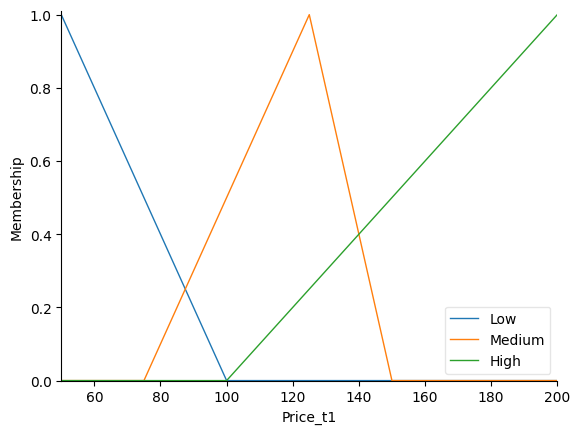

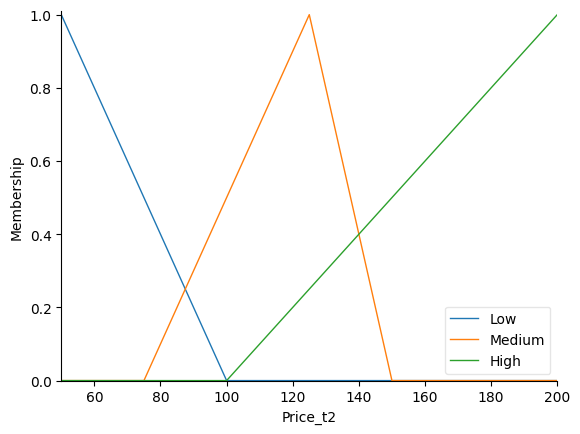

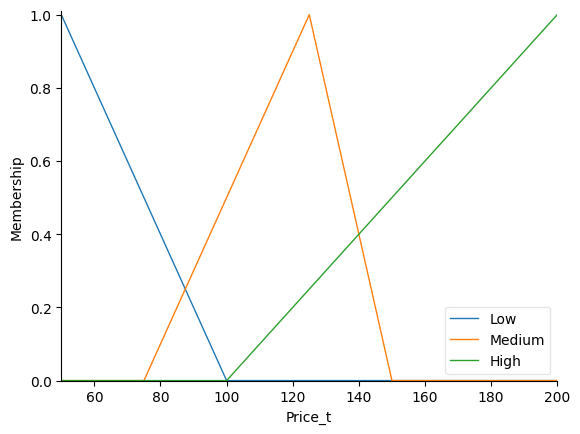

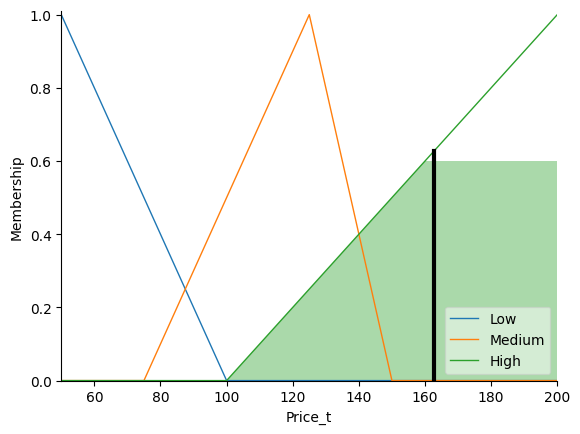

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Создание переменных
price_t1 = ctrl.Antecedent(np.arange(50, 201, 1), 'Price_t1')  # Предыдущая цена (P_{t-1})
price_t2 = ctrl.Antecedent(np.arange(50, 201, 1), 'Price_t2')  # Предпредыдущая цена (P_{t-2})
price_t = ctrl.Consequent(np.arange(50, 201, 1), 'Price_t')    # Прогнозируемая цена (P_t)

# Определение функций принадлежности
price_t1['Low'] = fuzz.trimf(price_t1.universe, [50, 50, 100])
price_t1['Medium'] = fuzz.trimf(price_t1.universe, [75, 125, 150])
price_t1['High'] = fuzz.trimf(price_t1.universe, [100, 200, 200])

price_t2['Low'] = fuzz.trimf(price_t2.universe, [50, 50, 100])
price_t2['Medium'] = fuzz.trimf(price_t2.universe, [75, 125, 150])
price_t2['High'] = fuzz.trimf(price_t2.universe, [100, 200, 200])

price_t['Low'] = fuzz.trimf(price_t.universe, [50, 50, 100])
price_t['Medium'] = fuzz.trimf(price_t.universe, [75, 125, 150])
price_t['High'] = fuzz.trimf(price_t.universe, [100, 200, 200])

# Визуализация функций принадлежности
price_t1.view()
price_t2.view()
price_t.view()

# Определение правил
rule1 = ctrl.Rule(price_t1['High'] & price_t2['Medium'], price_t['High'])
rule2 = ctrl.Rule(price_t1['Medium'] & price_t2['Low'], price_t['Medium'])
rule3 = ctrl.Rule(price_t1['Low'] & price_t2['Low'], price_t['Low'])

# Создание системы управления
price_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
price_simulation = ctrl.ControlSystemSimulation(price_ctrl)

# Ввод данных
price_simulation.input['Price_t1'] = 160  # Предыдущая цена
price_simulation.input['Price_t2'] = 110  # Предпредыдущая цена

# Выполнение вычислений
price_simulation.compute()

# Вывод результатов
print(f"Прогнозируемая цена: {price_simulation.output['Price_t']} USD")
price_t.view(sim=price_simulation)

plt.show()

###Пример 2.

Датасет:
   Price  Volume   Change
0    100    5000   Growth
1    105    7000   Growth
2    110    8000   Growth
3     95    4000  Decline
4    102    6000   Stable
5     98    4500  Decline
6    103    7500   Growth
7    107    8500   Growth
8    104    5500   Stable
9    106    6500   Growth


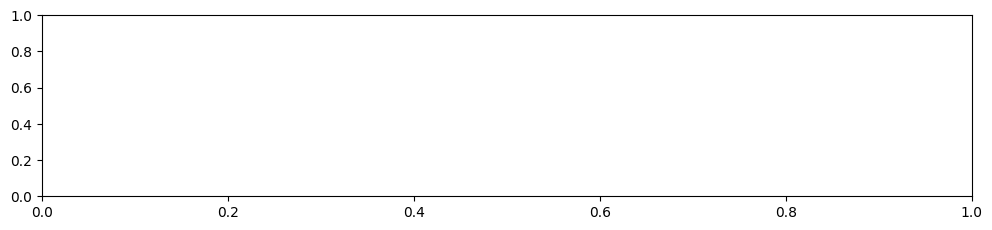

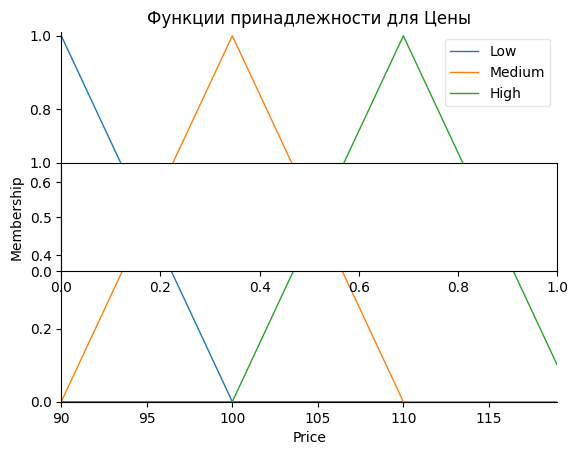

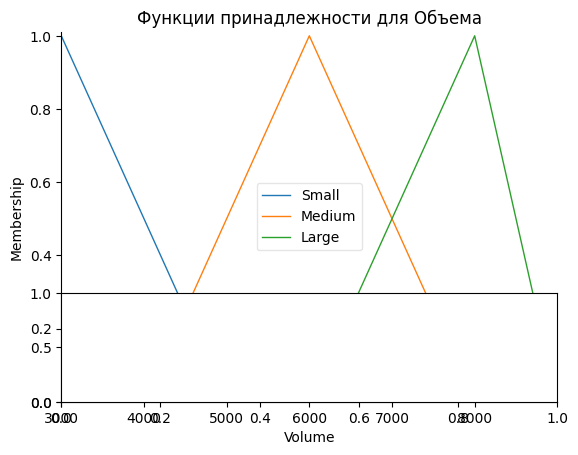

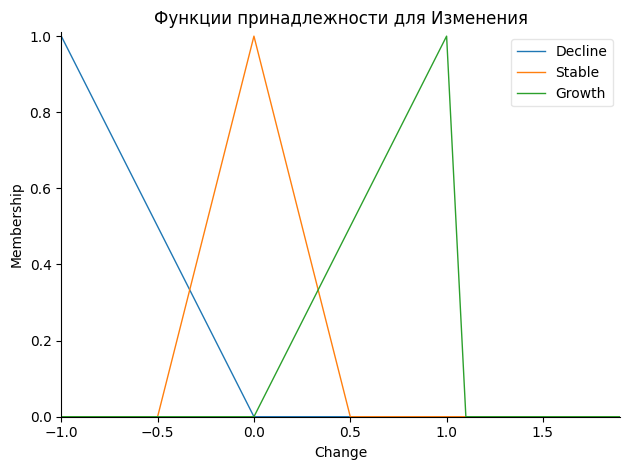

Ошибка при вычислении для Price=102, Volume=6000: 'Change'

Прогнозы:
Цена: 105, Объем: 7000 → Growth
Цена: 98, Объем: 4500 → Stable
Цена: 102, Объем: 6000 → Undefined
Не удалось построить график, так как результат не определён.


In [ ]:
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Шаг 1: Создание датасета
data = {
    'Price': [100, 105, 110, 95, 102, 98, 103, 107, 104, 106],
    'Volume': [5000, 7000, 8000, 4000, 6000, 4500, 7500, 8500, 5500, 6500],
    'Change': ['Growth', 'Growth', 'Growth', 'Decline', 'Stable', 'Decline', 'Growth', 'Growth', 'Stable', 'Growth']
}

df = pd.DataFrame(data)
print("Датасет:")
print(df)

# Шаг 2: Определение нечётких множеств
price = ctrl.Antecedent(np.arange(90, 120, 1), 'Price')
volume = ctrl.Antecedent(np.arange(3000, 9000, 1), 'Volume')
change = ctrl.Consequent(np.arange(-1, 2, 0.1), 'Change')

# Функции принадлежности для "Цены"
price['Low'] = fuzz.trimf(price.universe, [90, 90, 100])
price['Medium'] = fuzz.trimf(price.universe, [90, 100, 110])
price['High'] = fuzz.trimf(price.universe, [100, 110, 120])

# Функции принадлежности для "Объема"
volume['Small'] = fuzz.trimf(volume.universe, [3000, 3000, 5000])
volume['Medium'] = fuzz.trimf(volume.universe, [4000, 6000, 8000])
volume['Large'] = fuzz.trimf(volume.universe, [6000, 8000, 9000])

# Функции принадлежности для "Изменения"
change['Decline'] = fuzz.trimf(change.universe, [-1, -1, 0])
change['Stable'] = fuzz.trimf(change.universe, [-0.5, 0, 0.5])
change['Growth'] = fuzz.trimf(change.universe, [0, 1, 1])

# Указываем метод дефаззификации
change.defuzzify_method = 'centroid'

# Визуализация функций принадлежности
plt.figure(figsize=(12, 8))

# График функций принадлежности для "Цены"
plt.subplot(3, 1, 1)
price.view()
plt.title('Функции принадлежности для Цены')

# График функций принадлежности для "Объема"
plt.subplot(3, 1, 2)
volume.view()
plt.title('Функции принадлежности для Объема')

# График функций принадлежности для "Изменения"
plt.subplot(3, 1, 3)
change.view()
plt.title('Функции принадлежности для Изменения')

plt.tight_layout()
plt.show()

# Шаг 3: Определение правил
rule1 = ctrl.Rule(price['High'] & volume['Large'], change['Growth'])
rule2 = ctrl.Rule(price['Medium'] & volume['Small'], change['Decline'])
rule3 = ctrl.Rule(price['Low'] & volume['Medium'], change['Stable'])

# Создаем систему управления
system_control = ctrl.ControlSystem([rule1, rule2, rule3])
simulation = ctrl.ControlSystemSimulation(system_control)

# Шаг 4: Прогнозирование
input_data = [
    {'Price': 105, 'Volume': 7000},
    {'Price': 98, 'Volume': 4500},
    {'Price': 102, 'Volume': 6000}
]

forecasts = []
for data in input_data:
    # Задаем входные данные
    simulation.input['Price'] = data['Price']
    simulation.input['Volume'] = data['Volume']

    # Выполняем вычисления
    try:
        simulation.compute()  # Пытаемся выполнить вычисления
        forecast = simulation.output['Change']  # Получаем результат
        forecasts.append(forecast)
    except Exception as e:
        print(f"Ошибка при вычислении для Price={data['Price']}, Volume={data['Volume']}: {e}")
        forecasts.append(None)  # Если произошла ошибка, добавляем None

# Интерпретация результатов
interpretation = []
for forecast in forecasts:
    if forecast is None:
        interpretation.append('Undefined')  # Если результат не определён
    elif forecast > 0.5:
        interpretation.append('Growth')
    elif forecast < -0.5:
        interpretation.append('Decline')
    else:
        interpretation.append('Stable')

# Вывод результатов
print("\nПрогнозы:")
for i, data in enumerate(input_data):
    print(f"Цена: {data['Price']}, Объем: {data['Volume']} → {interpretation[i]}")

# Визуализация прогнозированного результата
if forecasts[-1] is not None:  # Проверяем, что последний результат не None
    plt.figure(figsize=(8, 5))
    change.view(sim=simulation)
    plt.title('Прогнозируемое изменение')
    plt.show()
else:
    print("Не удалось построить график, так как результат не определён.")

###Пример 3.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Проверка размеров:
Oil Data Length: 251
USD/RUB Data Length: 260
Inflation Data Length: 251
Geo Risk Data Length: 251


<Figure size 600x400 with 0 Axes>

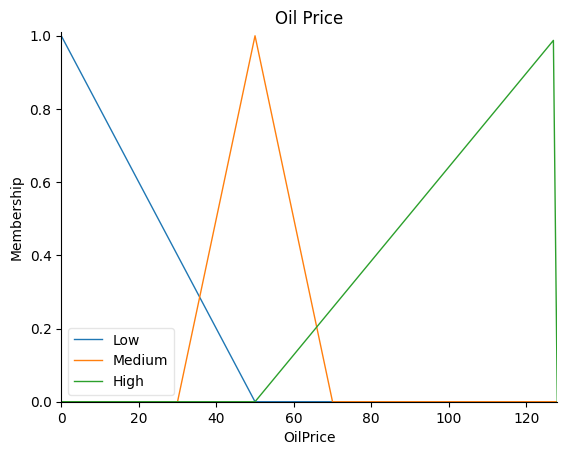

<Figure size 600x400 with 0 Axes>

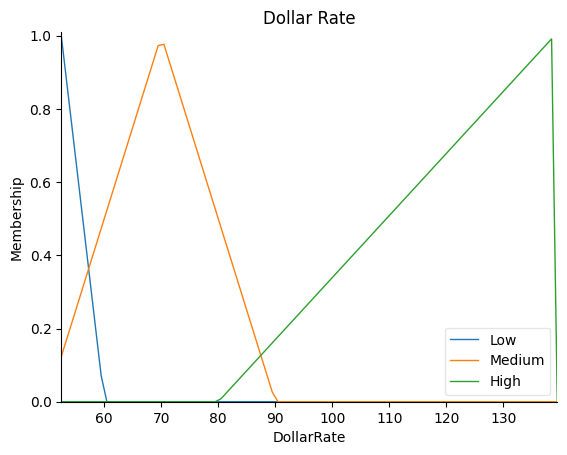

<Figure size 600x400 with 0 Axes>

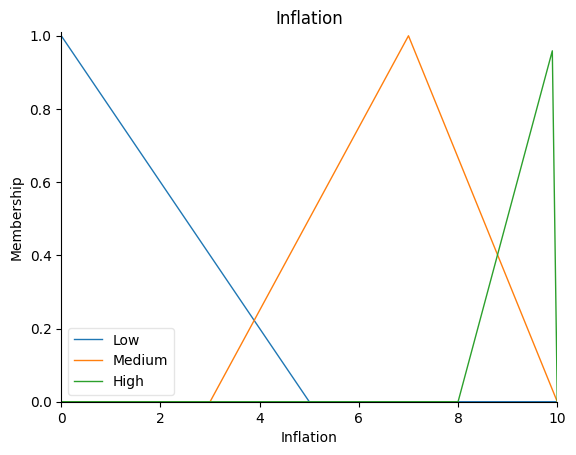

<Figure size 600x400 with 0 Axes>

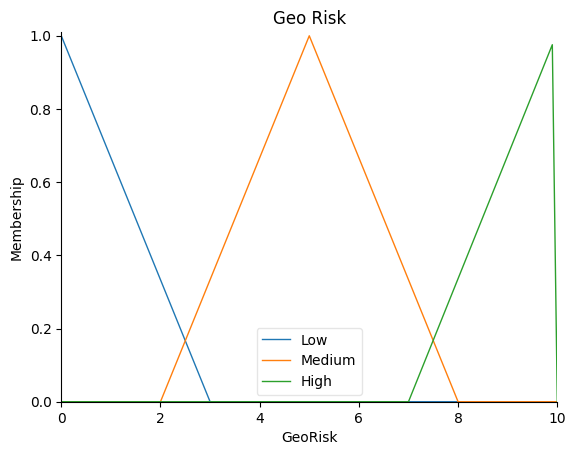

Ошибка при вычислении для строки 0: 'CurrencyChange'
Ошибка при вычислении для строки 1: 'CurrencyChange'
Ошибка при вычислении для строки 3: 'CurrencyChange'
Ошибка при вычислении для строки 4: 'CurrencyChange'
Ошибка при вычислении для строки 5: 'CurrencyChange'
Ошибка при вычислении для строки 6: 'CurrencyChange'
Ошибка при вычислении для строки 9: 'CurrencyChange'
Ошибка при вычислении для строки 10: 'CurrencyChange'
Ошибка при вычислении для строки 11: 'CurrencyChange'
Ошибка при вычислении для строки 13: 'CurrencyChange'
Ошибка при вычислении для строки 14: 'CurrencyChange'
Ошибка при вычислении для строки 15: 'CurrencyChange'
Ошибка при вычислении для строки 16: 'CurrencyChange'
Ошибка при вычислении для строки 18: 'CurrencyChange'
Ошибка при вычислении для строки 19: 'CurrencyChange'
Ошибка при вычислении для строки 20: 'CurrencyChange'
Ошибка при вычислении для строки 24: 'CurrencyChange'
Ошибка при вычислении для строки 25: 'CurrencyChange'
Ошибка при вычислении для строки 27

<Figure size 1000x600 with 0 Axes>

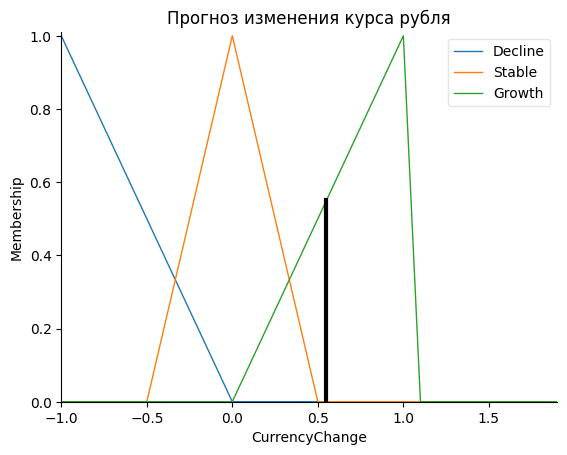


Статистика прогнозов:
Forecast
Undefined    140
Stable        65
Growth        33
Decline       13
Name: count, dtype: int64


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import random

# Загрузка данных о цене нефти (Brent) и курсе доллара к рублю
oil_data = yf.download('BZ=F', start='2022-01-01', end='2023-01-01')['Close']  # Brent crude oil
usd_rub_data = yf.download('USDRUB=X', start='2022-01-01', end='2023-01-01')['Close']  # USD/RUB exchange rate

# Генерация данных об инфляции и геополитическом риске
inflation_data = pd.Series(
    [random.uniform(4.0, 10.0) for _ in range(len(oil_data))],
    index=oil_data.index
)
geo_risk_data = pd.Series(
    [random.uniform(0, 10) for _ in range(len(oil_data))],
    index=oil_data.index
)

# Проверка размеров
print("Проверка размеров:")
print(f"Oil Data Length: {len(oil_data)}")
print(f"USD/RUB Data Length: {len(usd_rub_data)}")
print(f"Inflation Data Length: {len(inflation_data)}")
print(f"Geo Risk Data Length: {len(geo_risk_data)}")

# Обрезаем данные до минимальной длины
min_length = min(len(oil_data), len(usd_rub_data), len(inflation_data), len(geo_risk_data))
data = pd.DataFrame({
    'OilPrice': oil_data[:min_length].values.flatten(),
    'DollarRate': usd_rub_data[:min_length].values.flatten(),
    'Inflation': inflation_data[:min_length],
    'GeoRisk': geo_risk_data[:min_length]
}, index=oil_data.index[:min_length])

# Определение нечётких множеств
oil_price = ctrl.Antecedent(np.arange(0, data['OilPrice'].max() + 1, 1), 'OilPrice')
dollar_rate = ctrl.Antecedent(np.arange(data['DollarRate'].min(), data['DollarRate'].max() + 1, 1), 'DollarRate')
inflation = ctrl.Antecedent(np.arange(0, data['Inflation'].max() + 0.1, 0.1), 'Inflation')
geo_risk = ctrl.Antecedent(np.arange(0, data['GeoRisk'].max() + 0.1, 0.1), 'GeoRisk')
currency_change = ctrl.Consequent(np.arange(-1, 2, 0.1), 'CurrencyChange')

# Функции принадлежности
oil_price['Low'] = fuzz.trimf(oil_price.universe, [0, 0, 50])
oil_price['Medium'] = fuzz.trimf(oil_price.universe, [30, 50, 70])
oil_price['High'] = fuzz.trimf(oil_price.universe, [50, data['OilPrice'].max(), data['OilPrice'].max()])

dollar_rate['Low'] = fuzz.trimf(dollar_rate.universe, [data['DollarRate'].min(), data['DollarRate'].min(), 60])
dollar_rate['Medium'] = fuzz.trimf(dollar_rate.universe, [50, 70, 90])
dollar_rate['High'] = fuzz.trimf(dollar_rate.universe, [80, data['DollarRate'].max(), data['DollarRate'].max()])

inflation['Low'] = fuzz.trimf(inflation.universe, [0, 0, 5])
inflation['Medium'] = fuzz.trimf(inflation.universe, [3, 7, 10])
inflation['High'] = fuzz.trimf(inflation.universe, [8, data['Inflation'].max(), data['Inflation'].max()])

geo_risk['Low'] = fuzz.trimf(geo_risk.universe, [0, 0, 3])
geo_risk['Medium'] = fuzz.trimf(geo_risk.universe, [2, 5, 8])
geo_risk['High'] = fuzz.trimf(geo_risk.universe, [7, data['GeoRisk'].max(), data['GeoRisk'].max()])

currency_change['Decline'] = fuzz.trimf(currency_change.universe, [-1, -1, 0])
currency_change['Stable'] = fuzz.trimf(currency_change.universe, [-0.5, 0, 0.5])
currency_change['Growth'] = fuzz.trimf(currency_change.universe, [0, 1, 1])

# Визуализация функций принадлежности
for var, name in zip([oil_price, dollar_rate, inflation, geo_risk], ['Oil Price', 'Dollar Rate', 'Inflation', 'Geo Risk']):
    plt.figure(figsize=(6, 4))
    var.view()
    plt.title(name)
plt.show()

# Определение правил
rule1 = ctrl.Rule(oil_price['High'] & inflation['Low'], currency_change['Growth'])
rule2 = ctrl.Rule(dollar_rate['High'] & geo_risk['High'], currency_change['Decline'])
rule3 = ctrl.Rule(inflation['Medium'] & oil_price['Medium'], currency_change['Stable'])
rule4 = ctrl.Rule(oil_price['Low'] & inflation['High'], currency_change['Decline'])
rule5 = ctrl.Rule(dollar_rate['Medium'] & geo_risk['Low'], currency_change['Stable'])

# Создание системы управления
system_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
simulation = ctrl.ControlSystemSimulation(system_control)

# Прогнозирование
forecasts = []
interpretation = []

for i in range(len(data)):
    # Проверка корректности входных данных
    if (
        data['OilPrice'].iloc[i] < oil_price.universe.min() or
        data['OilPrice'].iloc[i] > oil_price.universe.max() or
        data['DollarRate'].iloc[i] < dollar_rate.universe.min() or
        data['DollarRate'].iloc[i] > dollar_rate.universe.max() or
        data['Inflation'].iloc[i] < inflation.universe.min() or
        data['Inflation'].iloc[i] > inflation.universe.max() or
        data['GeoRisk'].iloc[i] < geo_risk.universe.min() or
        data['GeoRisk'].iloc[i] > geo_risk.universe.max()
    ):
        forecasts.append(None)
        interpretation.append('Undefined')
        continue

    simulation.input['OilPrice'] = data['OilPrice'].iloc[i]
    simulation.input['DollarRate'] = data['DollarRate'].iloc[i]
    simulation.input['Inflation'] = data['Inflation'].iloc[i]
    simulation.input['GeoRisk'] = data['GeoRisk'].iloc[i]

    try:
        simulation.compute()
        forecast = simulation.output['CurrencyChange']
        forecasts.append(forecast)

        if forecast > 0.5:
            interpretation.append('Growth')
        elif forecast < -0.5:
            interpretation.append('Decline')
        else:
            interpretation.append('Stable')
    except Exception as e:
        print(f"Ошибка при вычислении для строки {i}: {e}")
        forecasts.append(None)
        interpretation.append('Undefined')

# Добавляем результаты в DataFrame
data['Forecast'] = interpretation
data['ForecastValue'] = forecasts

# Вывод результатов
print("\nПрогнозы изменения курса рубля:")
print(data[['OilPrice', 'DollarRate', 'Inflation', 'GeoRisk', 'Forecast']].tail())

# Визуализация прогноза
plt.figure(figsize=(10, 6))
currency_change.view(sim=simulation)
plt.title('Прогноз изменения курса рубля')
plt.show()

# Статистика прогнозов
print("\nСтатистика прогнозов:")
print(data['Forecast'].value_counts())